# ColorCheckerÎ•º Ïù¥Ïö©Ìïú Î≥¥Ï†ï

## ÏàòÎèôÏúºÎ°ú ColorChecker ROI ÏßÄÏ†ï

In [42]:
import cv2
import numpy as np

image_path = r"F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\4weeks\manual\4W_L_1B_1.jpg"

# Ïù¥ÎØ∏ÏßÄ Î°úÎìú
with open(image_path, 'rb') as f:
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

# ÏõêÎ≥∏ ÌÅ¨Í∏∞ Ï†ÄÏû•
orig_h, orig_w = image.shape[:2]

# Ï∂ïÏÜå ÎπÑÏú® Í≥ÑÏÇ∞
resize_width = 1500
scale = resize_width / orig_w
resize_height = int(orig_h * scale)

# Ï∂ïÏÜå Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
resized_image = cv2.resize(image, (resize_width, resize_height))
clone = resized_image.copy()

# ÌÅ¥Î¶≠ Ï¢åÌëú Ï†ÄÏû•
points = []

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN and len(points) < 4:
        # Ï∂ïÏÜå ÎπÑÏú®Î°ú ÏõêÎ≥∏ Ï¢åÌëú ÌôòÏÇ∞
        orig_x = int(x / scale)
        orig_y = int(y / scale)
        points.append((orig_x, orig_y))
        cv2.circle(param, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow("Click ColorChecker corners", param)

# ÎßàÏö∞Ïä§ ÌÅ¥Î¶≠ UI
cv2.imshow("Click ColorChecker corners", clone)
cv2.setMouseCallback("Click ColorChecker corners", click_event, clone)
cv2.waitKey(0)
cv2.destroyAllWindows()

# ÌôïÏù∏
if len(points) != 4:
    raise ValueError("‚ùó Íº≠ÏßÄÏ†ê 4Í∞úÎ•º ÌÅ¥Î¶≠Ìï¥Ïïº Ìï©ÎãàÎã§.")

print("‚úÖ ÏõêÎ≥∏ Ìï¥ÏÉÅÎèÑ Í∏∞Ï§Ä ÌÅ¥Î¶≠ Ï¢åÌëú:", points)

‚úÖ ÏõêÎ≥∏ Ìï¥ÏÉÅÎèÑ Í∏∞Ï§Ä ÌÅ¥Î¶≠ Ï¢åÌëú: [(2770, 760), (2794, 1117), (3040, 1093), (3021, 746)]


## ColorChecker Î∂ÄÎ∂Ñ Ï∂îÏ∂úÏùÑ ÏúÑÌïú ÏõêÍ∑º Î≥ÄÌôò ÌñâÎ†¨ Î∞è Ïù¥ÎØ∏ÏßÄ ÏôúÍ≥° Î≥¥Ï†ï ÌõÑ Ï†ÄÏû•

In [44]:
# ÏàúÏÑú Ï†ïÎ†¨: Ï¢åÏÉÅ-Ïö∞ÏÉÅ-Ïö∞Ìïò-Ï¢åÌïò ÏàúÏÑú ÌïÑÏöî
def sort_corners(pts):
    pts = np.array(pts, dtype="float32")
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)
    return np.array([
        pts[np.argmin(s)],      # top-left
        pts[np.argmin(diff)],   # top-right
        pts[np.argmax(s)],      # bottom-right
        pts[np.argmax(diff)]    # bottom-left
    ], dtype="float32")

src_pts = sort_corners(points)

# ÎåÄÏÉÅ ÌÅ¨Í∏∞ ÏÑ§Ï†ï (Ïòà: 600x400 ÌîΩÏÖÄ)
width, height = 600, 400
dst_pts = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]], dtype="float32")

# ÏõêÍ∑º Î≥ÄÌôò
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
warped = cv2.warpPerspective(image, M, (width, height))

cv2.imwrite(r"F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\4weeks\cal_only_one\colorchecker_roi.jpg", warped)

False

## ÏÉâ Î≥ÄÌôòÏùÑ ÏúÑÌï¥ ColorChecker ÎÇ¥ ÏÉâÏÉÅÏùÑ ÏùΩÎäî ÏàúÏÑú ÏÑ§Ï†ï

- D65 Í≥µÏãù ÏÉâÏÉÅÌëú Ï∞∏Ï°∞: https://xritephoto.com/documents/literature/en/ColorData-1p_EN.pdf

In [45]:
H, W, _ = warped.shape

rows, cols = 6, 4
patch_h = H // rows
patch_w = W // cols

observed_colors = []

for col in range(cols):  # ÏôºÏ™Ω ‚Üí Ïò§Î•∏Ï™Ω
    for row in reversed(range(rows)):  # ÏïÑÎûò ‚Üí ÏúÑ
        y1 = row * patch_h
        y2 = (row + 1) * patch_h
        x1 = col * patch_w
        x2 = (col + 1) * patch_w
        patch = warped[y1:y2, x1:x2]
        mean_color = patch.mean(axis=(0, 1))  # BGR
        observed_colors.append(mean_color[::-1])  # RGB

## ÏÉâÏÉÅ Îß§Ìä∏Î¶≠Ïä§ ÏÑ†Ìòï ÌïôÏäµ

In [46]:
from sklearn.linear_model import LinearRegression

observed_colors = np.array(observed_colors, dtype=np.float32)

# D65 Í∏∞Ï§Ä Î†àÌçºÎü∞Ïä§ (ÏàúÏÑú ÎèôÏùºÌï¥Ïïº Ìï®)
reference_colors = np.array([
    [115, 82, 68], [194, 150, 130], [98, 122, 157], [87, 108, 67],
    [133, 128, 177], [103, 189, 170], [214, 126, 44], [80, 91, 166],
    [193, 90, 99], [94, 60, 108], [157, 188, 64], [224, 163, 46],
    [56, 61, 150], [70, 148, 73], [175, 54, 60], [231, 199, 31],
    [187, 86, 149], [8, 133, 161], [243, 243, 242], [200, 200, 200],
    [160, 160, 160], [122, 122, 121], [85, 85, 85], [52, 52, 52]
], dtype=np.float32)

# Î≥¥Ï†ï Îß§Ìä∏Î¶≠Ïä§ ÌïôÏäµ
reg = LinearRegression()
reg.fit(observed_colors, reference_colors)

LinearRegression()

## Ïù¥ÎØ∏ÏßÄ ÎÇ¥ ColorChecker ÏÉâÍ≥º D65 ÏÉâÏÉÅ Î∞è ÏàúÏÑú ÎπÑÍµê

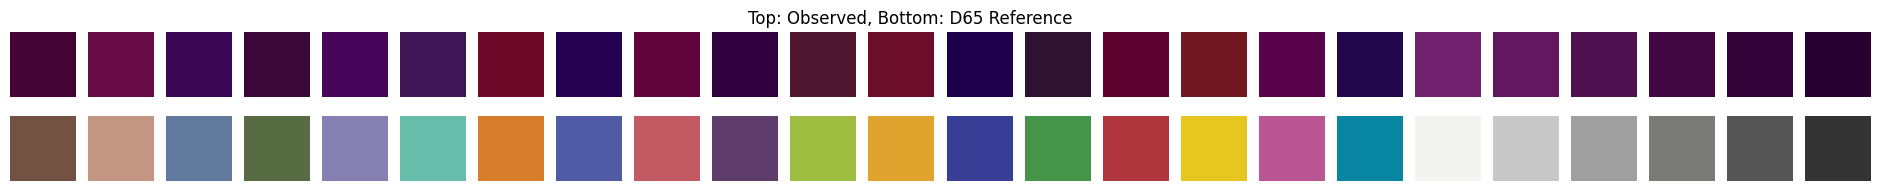

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 24, figsize=(24, 2))
for i in range(24):
    axes[0, i].imshow([[observed_colors[i]/255]])
    axes[0, i].axis('off')
    axes[1, i].imshow([[reference_colors[i]/255]])
    axes[1, i].axis('off')
plt.suptitle("Top: Observed, Bottom: D65 Reference")
plt.show()

## ÏÉòÌîå Ìïú Í∞úÏùò ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞

In [36]:
import cv2
import numpy as np

path = r"F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\4weeks\manual\4W_L_1B_1.jpg"

with open(path, 'rb') as f:
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    image_bgr = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

if image_bgr is None:
    raise ValueError("‚ùó Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò§ÏßÄ Î™ªÌñàÏäµÎãàÎã§. ÌååÏùºÏù¥ ÏÜêÏÉÅÎêòÏóàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.")

# RGB Î≥ÄÌôò
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

## ÏõêÎ≥∏ ÏÉòÌîåÏùò Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄÏóê Î≥¥Ï†ï Ï†ÅÏö©

In [37]:
from sklearn.linear_model import LinearRegression

# ÏòàÏãú: reg = LinearRegression().fit(observed_colors, reference_colors)
# ÏúÑÏóêÏÑú ÌïôÏäµÎêú reg ÏÇ¨Ïö©

# Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄÏóê Î≥¥Ï†ï Ï†ÅÏö©
flat_rgb = image_rgb.reshape(-1, 3)
corrected_flat = reg.predict(flat_rgb)
corrected_rgb = np.clip(corrected_flat, 0, 255).reshape(image_rgb.shape).astype(np.uint8)

## ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôò Í≤∞Í≥º Ï†ÄÏû• Î∞è Ï∂úÎ†•

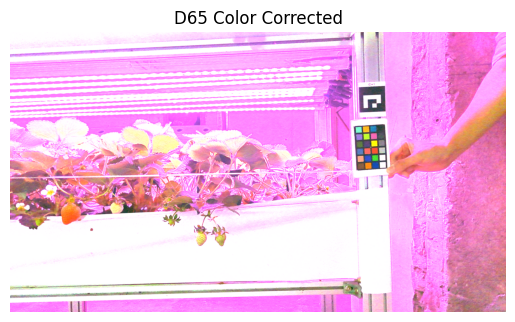

In [52]:
# Ïù¥ÎØ∏ÏßÄ Î©îÎ™®Î¶¨ Î≤ÑÌçºÎ°ú Ï†ÄÏû•
success, buffer = cv2.imencode(".jpg", corrected_bgr)
if success:
    with open(r"F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\4weeks\cal_only_one\corrected_image_d65.jpg", "wb") as f:
        f.write(buffer)


# Í≤∞Í≥º Î≥¥Í∏∞ (optional)
import matplotlib.pyplot as plt
plt.imshow(corrected_rgb)
plt.title("D65 Color Corrected")
plt.axis('off')
plt.show()

## Ìè¥Îçî ÎÇ¥ Ïù¥ÎØ∏ÏßÄ Ï†ÑÎ∂ÄÏóê Ï†ÅÏö©

- ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ï∂îÏ∂úÌïú Îß§Ìä∏Î¶≠Ïä§Î°ú Ï†ÑÏ≤¥ Î≥¥Ï†ï Ìï¥Î≥¥Í∏∞

In [53]:
import os
import cv2
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Ìè¥Îçî ÏÑ§Ï†ï
input_dir = r"F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\4weeks\manual"
output_dir = r"F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\4weeks\cal_only_one"
os.makedirs(output_dir, exist_ok=True)

# 2. ÌôïÏû•Ïûê Í∏∞Ï§Ä Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# 3. Ï†ÑÏ†ú: Î≥¥Ï†ï Î™®Îç∏Ïù¥ Ïù¥ÎØ∏ ÌïôÏäµÎê® (reg)
# ÏòàÏãú: reg = LinearRegression().fit(observed_colors, reference_colors)

for filename in image_files:
    input_path = os.path.join(input_dir, filename)
    output_path = os.path.join(output_dir, filename)

    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú (ÌïúÍ∏Ä Í≤ΩÎ°ú ÎåÄÏùë)
    with open(input_path, 'rb') as f:
        file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
        image_bgr = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

    if image_bgr is None:
        print(f"‚ùå Î∂àÎü¨Ïò§Í∏∞ Ïã§Ìå®: {filename}")
        continue

    # ÏÉâÏÉÅ Î≥¥Ï†ï
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    flat_rgb = image_rgb.reshape(-1, 3)
    corrected_flat = reg.predict(flat_rgb)
    corrected_rgb = np.clip(corrected_flat, 0, 255).reshape(image_rgb.shape).astype(np.uint8)
    corrected_bgr = cv2.cvtColor(corrected_rgb, cv2.COLOR_RGB2BGR)

    # ÌïúÍ∏Ä Í≤ΩÎ°ú ÎåÄÏùë Ï†ÄÏû• (cv2.imencode Î∞©Ïãù)
    success, buffer = cv2.imencode(".jpg", corrected_bgr)
    if success:
        with open(output_path, "wb") as f:
            f.write(buffer)
        print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {filename}")
    else:
        print(f"‚ùå Ï†ÄÏû• Ïã§Ìå®: {filename}")

‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_1.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_2.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_3.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_4.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_5.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_6.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_7.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_8.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_9.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_10.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_11.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_12.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_13.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_14.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_15.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_16.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_17.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_18.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_19.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_20.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_21.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_22.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_23.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_1B_24.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_2B_1.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_2B_2.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_2B_3.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_2B_4.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_2B_5.jpg
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 4W_L_2B_6

## Ïó¨Îü¨ Í≤ΩÎ°ú Ìïú Î≤àÏóê ÏàòÌñâÌïòÍ∏∞

In [55]:
base_path = r"F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\{}\manual"
output_path = r"F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\{}\cal_only_one"
folder_names = ["1weeks", "2weeks", "3weeks"]

for name in folder_names:
    path1 = base_path.format(name)
    print("üìÅ Í≤ΩÎ°ú:", path1)
    path2 = output_path.format(name)
    print("üìÅ Í≤ΩÎ°ú:", path2)

    # 1. Ìè¥Îçî ÏÑ§Ï†ï
    input_dir = path1
    output_dir = path2
    os.makedirs(output_dir, exist_ok=True)
    
    # 2. ÌôïÏû•Ïûê Í∏∞Ï§Ä Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # 3. Ï†ÑÏ†ú: Î≥¥Ï†ï Î™®Îç∏Ïù¥ Ïù¥ÎØ∏ ÌïôÏäµÎê® (reg)
    # ÏòàÏãú: reg = LinearRegression().fit(observed_colors, reference_colors)

    for filename in image_files:
        input_path = os.path.join(input_dir, filename)
        save_path = os.path.join(output_dir, filename)

        # Ïù¥ÎØ∏ÏßÄ Î°úÎìú (ÌïúÍ∏Ä Í≤ΩÎ°ú ÎåÄÏùë)
        with open(input_path, 'rb') as f:
            file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
            image_bgr = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

        if image_bgr is None:
            print(f"‚ùå Î∂àÎü¨Ïò§Í∏∞ Ïã§Ìå®: {filename}")
            continue

        # ÏÉâÏÉÅ Î≥¥Ï†ï
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        flat_rgb = image_rgb.reshape(-1, 3)
        corrected_flat = reg.predict(flat_rgb)
        corrected_rgb = np.clip(corrected_flat, 0, 255).reshape(image_rgb.shape).astype(np.uint8)
        corrected_bgr = cv2.cvtColor(corrected_rgb, cv2.COLOR_RGB2BGR)

        # ÌïúÍ∏Ä Í≤ΩÎ°ú ÎåÄÏùë Ï†ÄÏû• (cv2.imencode Î∞©Ïãù)
        success, buffer = cv2.imencode(".jpg", corrected_bgr)
        if success:
            with open(save_path, "wb") as f:
                f.write(buffer)
            print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {filename}")
        else:
            print(f"‚ùå Ï†ÄÏû• Ïã§Ìå®: {filename}")

üìÅ Í≤ΩÎ°ú: F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\1weeks\manual
üìÅ Í≤ΩÎ°ú: F:\ÏÑ∏Ï¢ÖÎåÄÌïôÍµê\Í≥ºÏ†ú\Îî∏Í∏∞ÏàòÏßÅÎÜçÏû•_1Î≤àÍ≥ºÏ†ú\data\NEXTON\1weeks\cal_only_one
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_1.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_2.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_3.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_4.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_5.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_6.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_7.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_8.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_9.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_10.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_11.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_12.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_13.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_14.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_15.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_16.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_17.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_18.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_19.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_20.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_21.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_22.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_23.JPG
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 1W_L_1B_24.J